In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import pmdarima as pm
from sklearn.model_selection import train_test_split

In [174]:
#sep=';' é para separar as colunas por ponto e vírgula(pois o dataset esta formatado assim)
df = pd.read_csv(r'C:\Users\arthu\Downloads\HIST_PAINEL_COVIDBR_2020_Parte1_04abr2023.csv',sep=';')
df2 = pd.read_csv(r'C:\Users\arthu\Downloads\HIST_PAINEL_COVIDBR_2020_Parte2_04abr2023.csv',sep=';')
df3 = pd.read_csv(r'C:\Users\arthu\Downloads\HIST_PAINEL_COVIDBR_2021_Parte1_04abr2023.csv',sep=';')
df4 = pd.read_csv(r'C:\Users\arthu\Downloads\HIST_PAINEL_COVIDBR_2021_Parte2_04abr2023.csv',sep=';')

In [175]:
#pegue apenas as colunas estado, data, casosAcumulado, casosNovos
df = df[['estado','data','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos','Recuperadosnovos']]
df2 = df2[['estado','data','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos','Recuperadosnovos']]
df3 = df3[['estado','data','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos','Recuperadosnovos']]
df4 = df4[['estado','data','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos','Recuperadosnovos']]



In [176]:
#Como Recuperadosnovos tem muitos valores nulos, vamos retirar essa coluna
df = df.drop(columns=['Recuperadosnovos'])
df2 = df2.drop(columns=['Recuperadosnovos'])
df3 = df3.drop(columns=['Recuperadosnovos'])
df4 = df4.drop(columns=['Recuperadosnovos'])

In [177]:
#dropna() é para retirar as linhas que tem valores nulos
df = df.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()

In [178]:
#Agora vamos juntar todos os datasets em um só
df = df.append(df2) 
df = df.append(df3)
df = df.append(df4)

C:\Users\arthu\AppData\Local\Temp\ipykernel_2508\2216662375.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
C:\Users\arthu\AppData\Local\Temp\ipykernel_2508\2216662375.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3)
C:\Users\arthu\AppData\Local\Temp\ipykernel_2508\2216662375.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df4)


In [179]:
df

,estado,data,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,RO,2020-02-25,0.0,0,0,0
1,RO,2020-02-26,0.0,0,0,0
2,RO,2020-02-27,0.0,0,0,0
3,RO,2020-02-28,0.0,0,0,0
4,RO,2020-02-29,0.0,0,0,0
...,...,...,...,...,...,...
1033891,DF,2021-12-27,519103.0,225,11100,5
1033892,DF,2021-12-28,519196.0,93,11104,4
1033893,DF,2021-12-29,519346.0,150,11105,1
1033894,DF,2021-12-30,519546.0,200,11107,2


In [180]:
#somar os valores de data que são iguais e resetar o index para que não fique com valores repetidos
df = df.groupby('data').sum().reset_index() 

C:\Users\arthu\AppData\Local\Temp\ipykernel_2508\336546086.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('data').sum().reset_index()


In [181]:
df

,data,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,2020-02-25,0.0,0,0,0
1,2020-02-26,1.0,1,0,0
2,2020-02-27,1.0,0,0,0
3,2020-02-28,1.0,0,0,0
4,2020-02-29,2.0,1,0,0
...,...,...,...,...,...
671,2021-12-27,44492552.0,13680,1237068,172
672,2021-12-28,44509412.0,16860,1237410,342
673,2021-12-29,44527668.0,18256,1237634,224
674,2021-12-30,44554478.0,26810,1237968,334


In [182]:
#Vamos apenas utilizar obitosNovos onde data será o index
df = df[['data','obitosNovos']]
df['data'] = pd.date_range(start='2020-02-25', periods=len(df), freq='D')
df = df.set_index('data')
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

C:\Users\arthu\AppData\Local\Temp\ipykernel_2508\1028543809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.date_range(start='2020-02-25', periods=len(df), freq='D')


In [183]:
df

,obitosNovos
2020-02-25,0
2020-02-26,0
2020-02-27,0
2020-02-28,0
2020-02-29,0
...,...
2021-12-27,172
2021-12-28,342
2021-12-29,224
2021-12-30,334


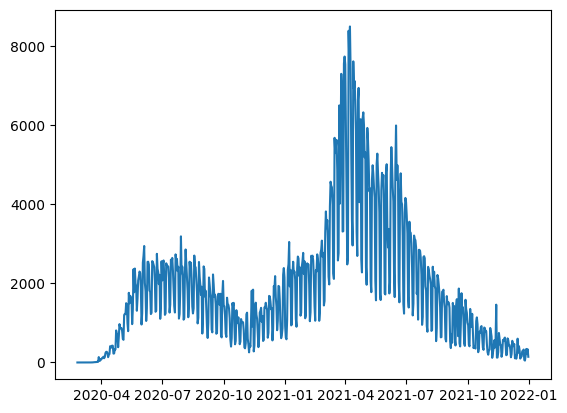

In [184]:
plt.plot(df['obitosNovos'])

plt.show()

In [185]:
def check_stationarity(series):

    result = adfuller(series) 

    print('Estatística ADF: %f' % result[0])

    print('p-valor: %f' % result[1])
    if result[1]<0.05:
        print('A série temporal é estacionária')
    else: 
        print('A série temporal não é estacionária pois p-valor ≥ 0,05')

In [186]:
check_stationarity(df['obitosNovos'])

Estatística ADF: -1.723969
p-valor: 0.418807
A série temporal não é estacionária pois p-valor ≥ 0,05


In [187]:
def series_decomposition(series, method='additive'):
    result = seasonal_decompose(series, model=method)
    result.plot()
    plt.show()

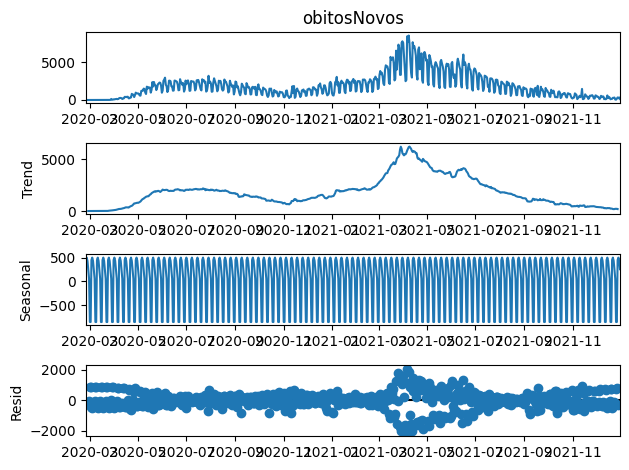

In [188]:
series_decomposition(df['obitosNovos'])

##### Podemos ver que os dados possuem tendência e sazonalidade. Isso exige o modelo SARIMA

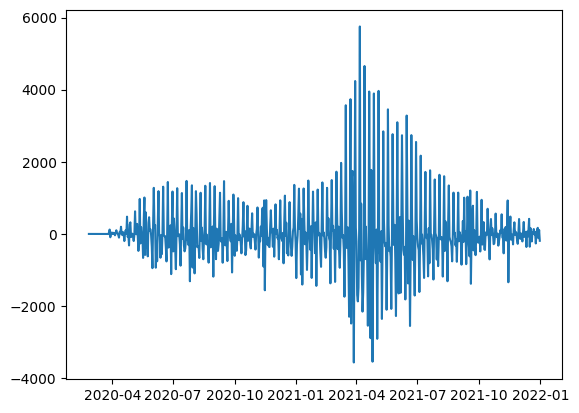

In [189]:
#Para aplicar modelos ARIMA/SARIMA é necessário que os dados sejam estacionários. 

df_diff = df
plt.plot(df_diff['obitosNovos'].diff(1)) #diferenciação de ordem 1 para tornar a série estacionária
plt.show()

In [190]:
# com uma ordem de diferenciação a série temporal já se torna estacionária
check_stationarity(df_diff['obitosNovos'].diff(1).dropna())

Estatística ADF: -4.036026
p-valor: 0.001233
A série temporal é estacionária


##### O parâmetro d é igual a 1 pois com uma ordem já foi possível tornar estacionária."d" é o número de vezes que é necessário diferenciar os dados originais para torná-los estacionários, ou seja, para remover a tendência e tornar a série temporal mais previsível.

In [191]:
#Agora vamos encontrar os outros parâmetros do modelo SARIMA (p,d,q)

def plot_acf_pacf_graphs(series):
    fig, ax = plt.subplots(2,1)
    fig = sm.graphics.tsa.plot_acf(series, lags=25, ax=ax[0])
    fig = sm.graphics.tsa.plot_pacf(series, lags=25, ax=ax[1])
    plt.tight_layout()
    plt.show()

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


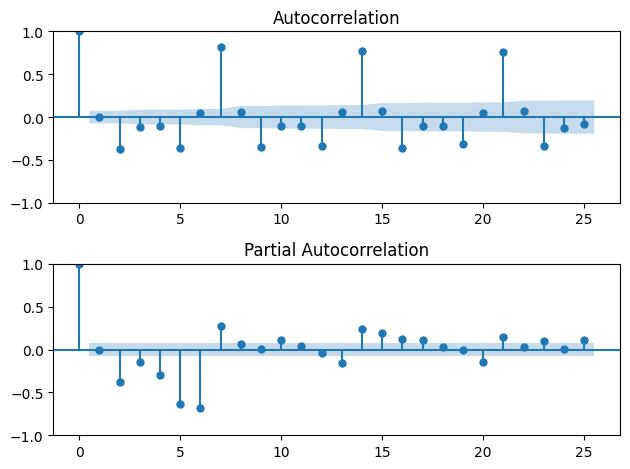

In [192]:
plot_acf_pacf_graphs(df['obitosNovos'].diff(1).dropna())

In [193]:
#Vamos utilizar o auto_arima para encontrar os parâmetros do modelo SARIMA
#Antes é preciso separar os dados de treino e teste 80% para treino e 20% para não viciar o modelo

train_size = 0.8

train, test = train_test_split(df, train_size=train_size, shuffle=False)

In [194]:
# cria o objeto auto_arima e ajusta o modelo apenas com os dados de treino 
model = pm.auto_arima(train, seasonal=True, m=7, trace=True, error_action='ignore', suppress_warnings=True) # m=7 sazonlidade semanal

# imprime os parâmetros do modelo ajustado
print(model.order) # (p, d, q)
print(model.seasonal_order) # (P, D, Q, s)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.82 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=8951.766, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=8294.646, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=8579.520, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=8949.776, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=8953.755, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=8235.260, Time=1.12 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=8217.282, Time=3.29 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=8197.830, Time=1.05 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=8646.482, Time=0.42 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=8198.746, Time=2.17 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=8519.420, Time=0.66 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=8235.619, Time=0.87 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=8

In [195]:
# Cria o modelo SARIMA com os parâmetros selecionados pelo auto_arima
model = sm.tsa.SARIMAX(train, order= model.order, seasonal_order=model.seasonal_order)

# Ajusta o modelo
model_fit = model.fit()

# Faz as previsões no conjunto de teste
predictions = model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=False)

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [196]:
#Avaliar o desempenho do modelo
mse = mean_squared_error(test, predictions)

# Calcula a raiz do erro médio quadrático
rmse = np.sqrt(mse)

# Calcula o erro absoluto médio
mae = np.mean(np.abs(predictions - test))

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


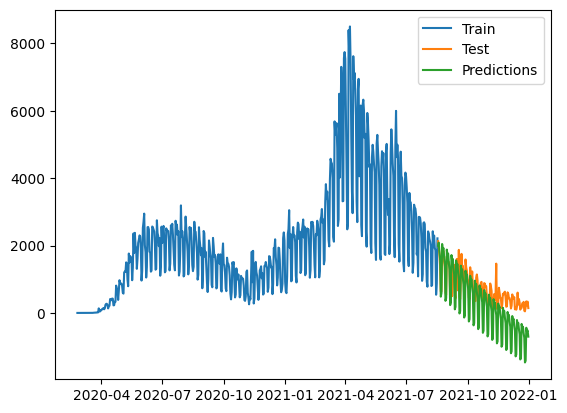

In [197]:
#Visualizar o desempenho do modelo
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()

### Vamos alterar a sazonalidade do modelo e ver o que ocorre.

In [198]:
# cria o objeto auto_arima e ajusta o modelo apenas com os dados de treino 
model = pm.auto_arima(train, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True) # m=12 sazonlidade mensal

# imprime os parâmetros do modelo ajustado
print(model.order) # (p, d, q)
print(model.seasonal_order) # (P, D, Q, s)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=8566.525, Time=2.23 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8951.766, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8888.177, Time=0.44 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8816.220, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8949.776, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=8568.331, Time=1.86 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=8680.201, Time=4.88 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=5.52 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=8592.330, Time=0.79 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=8570.240, Time=4.33 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=8679.963, Time=4.41 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=6.18 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=8709.704, Time=1.61 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept

In [280]:
# Cria o modelo SARIMA com os parâmetros selecionados pelo auto_arima
model = sm.tsa.SARIMAX(train, order= (5, 1, 0), seasonal_order= (2, 2, 2, 12))

# Ajusta o modelo
model_fit = model.fit()

# Faz as previsões no conjunto de teste
predictions = model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=False)

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [281]:
#Avaliar o desempenho do modelo
mse = mean_squared_error(test, predictions)

# Calcula a raiz do erro médio quadrático
rmse = np.sqrt(mse)

# Calcula o erro absoluto médio
mae = np.mean(np.abs(predictions - test))

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


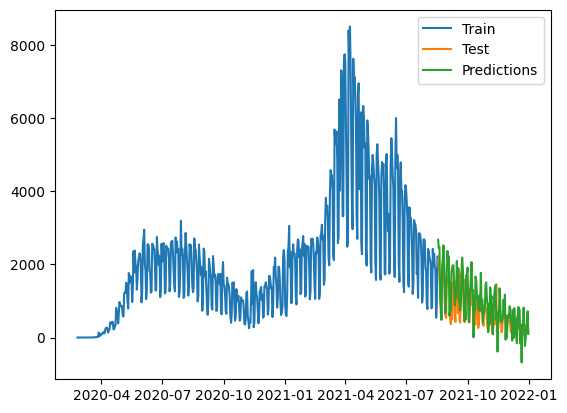

In [282]:
#Visualizar o desempenho do modelo
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()

### Após o ajuste manual dos parâmetros do modelo, a predição melhorou um pouco.